In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
print((df.Outcome==1).sum() ,(df.Outcome==0).sum())

268 500


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

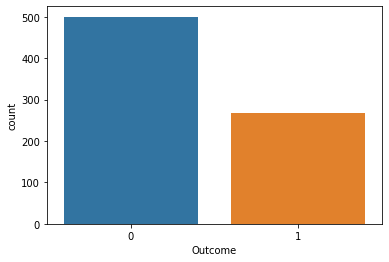

In [7]:
sns.countplot(df['Outcome'])

In [8]:
x=df.iloc[:,:-1].values
y=df.iloc[:,8].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(514, 8) (254, 8) (514,) (254,)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models=[]
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('rf',RandomForestClassifier(n_estimators=10)))
results=[]
for name, model in models:
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    print("SCORE OF {} IS:".format(name),model.score(X_train,y_train))
    print("SCORE OF {} IS:".format(name),model.score(X_test,y_test))
    

SCORE OF KNN IS: 0.7937743190661478
SCORE OF KNN IS: 0.7007874015748031
SCORE OF DT IS: 1.0
SCORE OF DT IS: 0.7007874015748031
SCORE OF rf IS: 0.9747081712062257
SCORE OF rf IS: 0.7244094488188977


In [11]:
#decision tree and Random forest seems to overfit model hence using KNN and applying grid search on it for hyperparameter tuning
neighbours= [i for i in range(2,11)]
power=[1,2]
param_grid = dict(n_neighbors=neighbours,p=power)

In [12]:
classifier=KNeighborsClassifier()

In [13]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=classifier, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.733467 using {'n_neighbors': 10, 'p': 2}


In [14]:
classifier=KNeighborsClassifier(n_neighbors= 10, p= 2)
classifier.fit(X_train,y_train)
ypred=classifier.predict(X_test)

In [15]:
print("SCORE OF KNN on train set is",classifier.score(X_train,y_train))
print("SCORE OF KNN on test set is",classifier.score(X_test,y_test))

SCORE OF KNN on train set is 0.7762645914396887
SCORE OF KNN on test set is 0.7125984251968503


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred)

array([[146,  22],
       [ 51,  35]], dtype=int64)